In [ ]:
import pandas as pd
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = "/content/drive/MyDrive/crop_data/crop_production.csv"

df = pd.read_csv(data_path)
df.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [ ]:
df.info()
df.columns
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
228075,Uttar Pradesh,SHAHJAHANPUR,2012,Kharif,Maize,1695.0,3212.0
21844,Assam,KARIMGANJ,2011,Kharif,Cotton(lint),28.0,13.0
132029,Maharashtra,NANDED,2006,Kharif,Castor seed,1100.0,200.0
422,Andhra Pradesh,ANANTAPUR,2002,Whole Year,Coconut,869.0,3691149.0
188269,Tamil Nadu,TIRUNELVELI,2003,Whole Year,Arecanut,122.0,NaN


In [ ]:
# standardize to lower for filtering
df['State_Name'] = df['State_Name'].str.lower()
df['Crop'] = df['Crop'].str.lower()

# filter Telangana and Rice
df_tel_rice = df[(df['State_Name'].str.contains("telangana")) &
                 (df['Crop'].str.contains("rice"))]

print("Rows for Telangana - Rice:", len(df_tel_rice))
df_tel_rice.head()


Rows for Telangana - Rice: 313


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
191223,telangana,ADILABAD,1997,Kharif,rice,30600.0,29100.0
191236,telangana,ADILABAD,1997,Rabi,rice,5200.0,12400.0
191250,telangana,ADILABAD,1998,Kharif,rice,66400.0,152300.0
191264,telangana,ADILABAD,1998,Rabi,rice,12200.0,33500.0
191278,telangana,ADILABAD,1999,Kharif,rice,66388.0,162451.0


In [ ]:
save_path = "/content/drive/MyDrive/rice_tel_yield.csv"
df_tel_rice.to_csv(save_path, index=False)
print("✅ Cleaned dataset saved at:", save_path)


✅ Cleaned dataset saved at: /content/drive/MyDrive/rice_tel_yield.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/drive/MyDrive/rice_tel_yield.csv")
df.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,telangana,ADILABAD,1997,Kharif,rice,30600.0,29100.0
1,telangana,ADILABAD,1997,Rabi,rice,5200.0,12400.0
2,telangana,ADILABAD,1998,Kharif,rice,66400.0,152300.0
3,telangana,ADILABAD,1998,Rabi,rice,12200.0,33500.0
4,telangana,ADILABAD,1999,Kharif,rice,66388.0,162451.0


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313 entries, 0 to 312
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     313 non-null    object 
 1   District_Name  313 non-null    object 
 2   Crop_Year      313 non-null    int64  
 3   Season         313 non-null    object 
 4   Crop           313 non-null    object 
 5   Area           313 non-null    float64
 6   Production     313 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 17.2+ KB


,Crop_Year,Area,Production
count,313.000000,313.000000,313.000000
mean,2004.964856,76173.517572,221072.447284
std,5.139906,54427.237142,177766.410750
min,1997.000000,12.000000,29.000000
25%,2000.000000,30600.000000,73608.000000
50%,2005.000000,63923.000000,164344.000000
75%,2009.000000,115000.000000,354000.000000
max,2014.000000,221971.000000,828396.000000


In [ ]:
df.isnull().sum()


,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,0


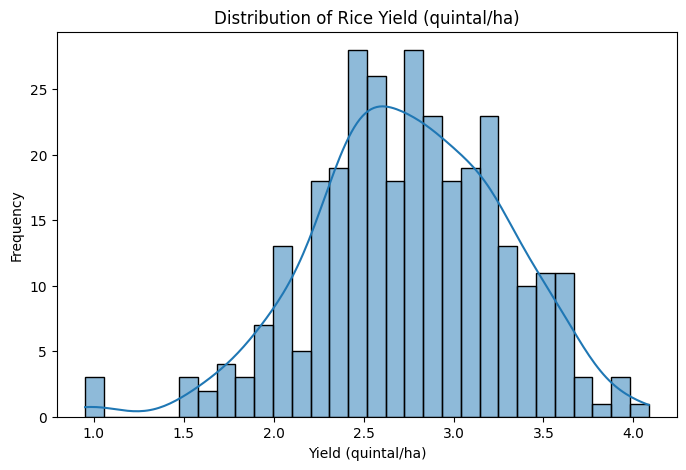

In [ ]:
# Calculate 'Yield'
df['Yield'] = df['Production'] / df['Area']

plt.figure(figsize=(8,5))
sns.histplot(df['Yield'], bins=30, kde=True)
plt.title("Distribution of Rice Yield (quintal/ha)")
plt.xlabel("Yield (quintal/ha)")
plt.ylabel("Frequency")
plt.show()

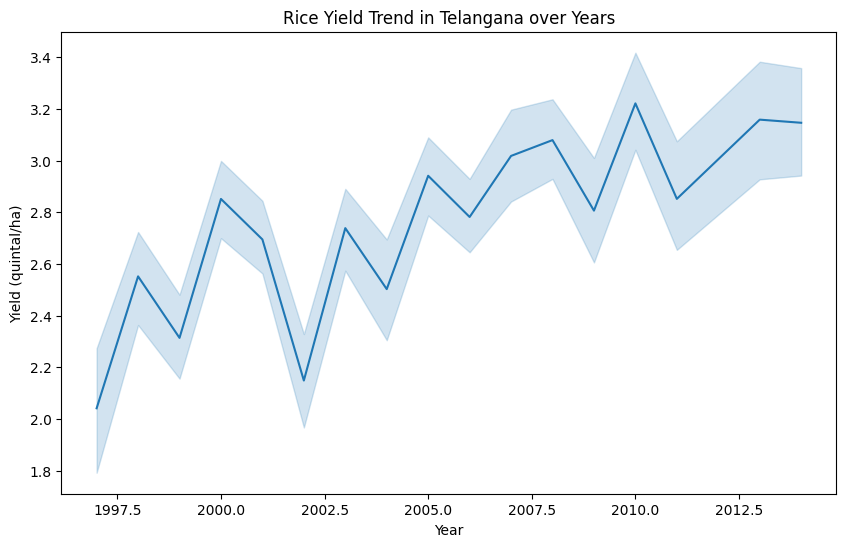

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='Crop_Year', y='Yield')
plt.title("Rice Yield Trend in Telangana over Years")
plt.ylabel("Yield (quintal/ha)")
plt.xlabel("Year")
plt.show()

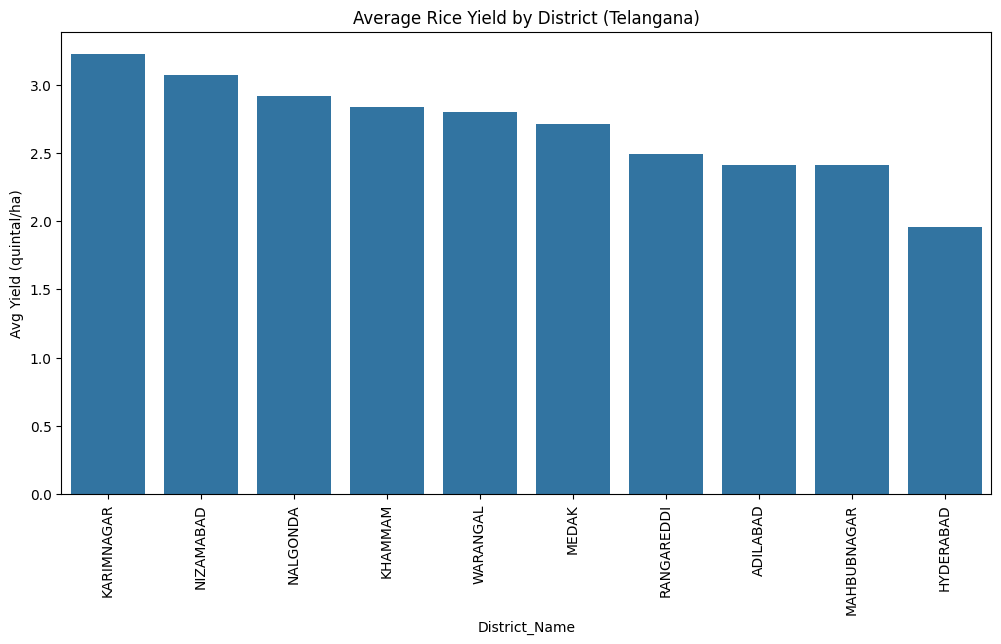

In [ ]:
plt.figure(figsize=(12,6))
avg_yield_district = df.groupby("District_Name")['Yield'].mean().sort_values(ascending=False)
sns.barplot(x=avg_yield_district.index, y=avg_yield_district.values)
plt.xticks(rotation=90)
plt.title("Average Rice Yield by District (Telangana)")
plt.ylabel("Avg Yield (quintal/ha)")
plt.show()


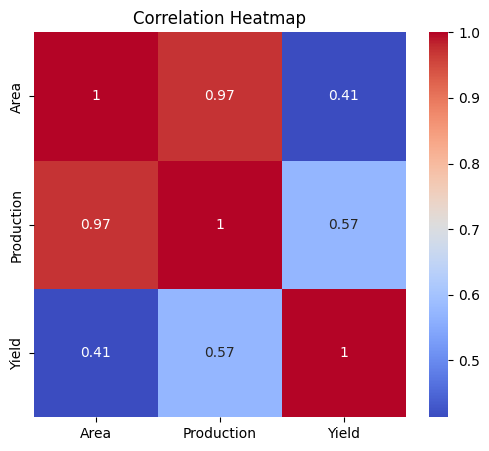

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(df[['Area','Production','Yield']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Mapping of new Telangana districts to their parent old districts (as per 2011 census boundaries)
district_mapping = {
    "Adilabad": "Adilabad",
    "Nirmal": "Adilabad",
    "Mancherial": "Adilabad",
    "Komaram Bheem": "Adilabad",

    "Nizamabad": "Nizamabad",
    "Kamareddy": "Nizamabad",

    "Karimnagar": "Karimnagar",
    "Jagtial": "Karimnagar",
    "Peddapalli": "Karimnagar",
    "Rajanna": "Karimnagar",

    "Medak": "Medak",
    "Sangareddy": "Medak",
    "Siddipet": "Medak",

    "Hyderabad": "Hyderabad",
    "Medchal": "Hyderabad",
    "Rangareddy": "Hyderabad",
    "Vikarabad": "Hyderabad",

    "Mahbubnagar": "Mahbubnagar",
    "Nagarkurnool": "Mahbubnagar",
    "Wanaparthy": "Mahbubnagar",
    "Jogulamba": "Mahbubnagar",

    "Nalgonda": "Nalgonda",
    "Suryapet": "Nalgonda",
    "Yadadri": "Nalgonda",
    "Bhongir": "Nalgonda",

    "Warangal": "Warangal",
    "JayaShankar": "Warangal",
    "Mahabubabad": "Warangal",
    "Mulugu": "Warangal",
    "Hanamkonda": "Warangal",

    "Khammam": "Khammam",
    "Kothagudem": "Khammam"
}


In [ ]:
# Make sure District_Name is consistent
df_tel_rice['District_Name'] = df_tel_rice['District_Name'].str.strip()

# Reverse mapping (old → new group list)
from collections import defaultdict
parent_to_children = defaultdict(list)
for new_dist, parent in district_mapping.items():
    parent_to_children[parent].append(new_dist)

# Example: Nalgonda → [Nalgonda, Suryapet, Yadadri, Bhongir]
print(parent_to_children["Nalgonda"])


['Nalgonda', 'Suryapet', 'Yadadri', 'Bhongir']


In [ ]:
def get_parent_district(district):
    return district_mapping.get(district, district)

# Example
farmer_input = "Bhongir"
parent_district = get_parent_district(farmer_input)
print("Mapped to parent district:", parent_district)

# Filter data for that parent district
df_selected = df_tel_rice[df_tel_rice['District_Name'] == parent_district]
print(df_selected.head())


Mapped to parent district: Nalgonda
Empty DataFrame
Columns: [State_Name, District_Name, Crop_Year, Season, Crop, Area, Production]
Index: []


In [ ]:
save_path = "/content/drive/MyDrive/rice_tel_final.csv"
df_tel_rice.to_csv(save_path, index=False)
print("✅ Final dataset with mapping saved at:", save_path)


✅ Final dataset with mapping saved at: /content/drive/MyDrive/rice_tel_final.csv


In [ ]:
district_coords = {
    # Base districts with actual lat–lon
    "Adilabad": {"lat": 19.6660, "lon": 78.5330},
    "Nizamabad": {"lat": 18.6720, "lon": 78.0940},
    "Karimnagar": {"lat": 18.4386, "lon": 79.1285},
    "Medak": {"lat": 17.9250, "lon": 78.2670},
    "Hyderabad": {"lat": 17.3850, "lon": 78.4867},
    "Mahbubnagar": {"lat": 16.7421, "lon": 77.9845},
    "Nalgonda": {"lat": 17.0500, "lon": 79.2700},
    "Warangal": {"lat": 18.0000, "lon": 79.5800},
    "Khammam": {"lat": 17.2473, "lon": 80.1514},

    # Adilabad splits
    "Nirmal": {"lat": 19.6660, "lon": 78.5330},
    "Mancherial": {"lat": 19.6660, "lon": 78.5330},
    "Komaram Bheem": {"lat": 19.6660, "lon": 78.5330},

    # Nizamabad splits
    "Kamareddy": {"lat": 18.6720, "lon": 78.0940},

    # Karimnagar splits
    "Jagtial": {"lat": 18.4386, "lon": 79.1285},
    "Peddapalli": {"lat": 18.4386, "lon": 79.1285},
    "Rajanna": {"lat": 18.4386, "lon": 79.1285},

    # Medak splits
    "Sangareddy": {"lat": 17.9250, "lon": 78.2670},
    "Siddipet": {"lat": 17.9250, "lon": 78.2670},

    # Hyderabad splits
    "Medchal": {"lat": 17.3850, "lon": 78.4867},
    "Rangareddy": {"lat": 17.3850, "lon": 78.4867},
    "Vikarabad": {"lat": 17.3850, "lon": 78.4867},

    # Mahbubnagar splits
    "Nagarkurnool": {"lat": 16.7421, "lon": 77.9845},
    "Wanaparthy": {"lat": 16.7421, "lon": 77.9845},
    "Jogulamba": {"lat": 16.7421, "lon": 77.9845},

    # Nalgonda splits
    "Suryapet": {"lat": 17.0500, "lon": 79.2700},
    "Yadadri": {"lat": 17.0500, "lon": 79.2700},
    "Bhongir": {"lat": 17.0500, "lon": 79.2700},

    # Warangal splits
    "JayaShankar": {"lat": 18.0000, "lon": 79.5800},
    "Mahabubabad": {"lat": 18.0000, "lon": 79.5800},
    "Mulugu": {"lat": 18.0000, "lon": 79.5800},
    "Hanamkonda": {"lat": 18.0000, "lon": 79.5800},

    # Khammam split
    "Kothagudem": {"lat": 17.2473, "lon": 80.1514}
}


In [ ]:
import pandas as pd
import requests
import time


In [ ]:
import pandas as pd
import numpy as np
import requests
import time

# --- Function to fetch NASA POWER weather data ---
def fetch_nasa_weather(lat, lon, start_year, end_year):
    """
    Fetch daily data for T2M (temperature) and PRECTOTCORR (precipitation) from NASA POWER
    Returns a DataFrame with daily temperature and rainfall.
    """
    url = f"https://power.larc.nasa.gov/api/temporal/daily/point?" \
          f"parameters=T2M,T2M_MAX,T2M_MIN,PRECTOTCORR&community=AG&longitude={lon}&latitude={lat}" \
          f"&start={start_year}0101&end={end_year}1231&format=JSON"

    response = requests.get(url)
    response.raise_for_status()  # Raise exception if request fails
    data = response.json()

    daily_data = data.get('properties', {}).get('parameter', {})

    dates, temps, rainfalls = [], [], []

    for date_str, temp_val in daily_data.get('T2M', {}).items():
        dates.append(date_str)
        temps.append(temp_val)
        rainfalls.append(daily_data.get('PRECTOTCORR', {}).get(date_str, np.nan))

    df = pd.DataFrame({
        'date': pd.to_datetime(dates, format='%Y%m%d'),
        'temp': temps,
        'rainfall': rainfalls
    })
    df['year'] = df['date'].dt.year
    return df

# --- Function to aggregate seasonal features (Kharif: June-Nov) ---
def aggregate_season_features(df, season_start=6, season_end=11):
    df_season = df[df['date'].dt.month.between(season_start, season_end)]
    agg_df = df_season.groupby('year').agg(
        rainfall_total = ('rainfall', 'sum'),
        rainfall_days = ('rainfall', lambda x: (x>0).sum()),
        avg_temp = ('temp', 'mean'),
        max_temp = ('temp', 'max'),
        min_temp = ('temp', 'min')
    ).reset_index()
    return agg_df

# --- Fetch weather for all Telangana districts ---
# --- Fetch weather for all Telangana districts (1997-2014) ---
weather_features_all = []

for district, coords in district_coords.items():
    print(f"Fetching weather for {district}...")
    # Update years here
    df_weather = fetch_nasa_weather(coords['lat'], coords['lon'], start_year=1997, end_year=2014)
    df_agg = aggregate_season_features(df_weather)
    df_agg['District_Name'] = district
    weather_features_all.append(df_agg)
    time.sleep(1)  # polite pause to avoid rate limit

df_weather_final = pd.concat(weather_features_all, ignore_index=True)
df_weather_final.head()


Fetching weather for Adilabad...
Fetching weather for Nizamabad...
Fetching weather for Karimnagar...
Fetching weather for Medak...
Fetching weather for Hyderabad...
Fetching weather for Mahbubnagar...
Fetching weather for Nalgonda...
Fetching weather for Warangal...
Fetching weather for Khammam...
Fetching weather for Nirmal...
Fetching weather for Mancherial...
Fetching weather for Komaram Bheem...
Fetching weather for Kamareddy...
Fetching weather for Jagtial...
Fetching weather for Peddapalli...
Fetching weather for Rajanna...
Fetching weather for Sangareddy...
Fetching weather for Siddipet...
Fetching weather for Medchal...
Fetching weather for Rangareddy...
Fetching weather for Vikarabad...
Fetching weather for Nagarkurnool...
Fetching weather for Wanaparthy...
Fetching weather for Jogulamba...
Fetching weather for Suryapet...
Fetching weather for Yadadri...
Fetching weather for Bhongir...
Fetching weather for JayaShankar...
Fetching weather for Mahabubabad...
Fetching weather fo

,year,rainfall_total,rainfall_days,avg_temp,max_temp,min_temp,District_Name
0,1997,814.21,158,26.489235,36.25,22.32,Adilabad
1,1998,1009.35,160,26.486667,39.14,17.08,Adilabad
2,1999,839.60,136,25.294208,35.50,17.31,Adilabad
3,2000,657.90,136,26.540601,31.40,23.02,Adilabad
4,2001,716.29,138,25.849781,35.54,19.75,Adilabad


In [ ]:
import pandas as pd

# Load your rice yield dataset
df_yield = pd.read_csv("/content/drive/MyDrive/rice_tel_final.csv")
df_yield.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,telangana,ADILABAD,1997,Kharif,rice,30600.0,29100.0
1,telangana,ADILABAD,1997,Rabi,rice,5200.0,12400.0
2,telangana,ADILABAD,1998,Kharif,rice,66400.0,152300.0
3,telangana,ADILABAD,1998,Rabi,rice,12200.0,33500.0
4,telangana,ADILABAD,1999,Kharif,rice,66388.0,162451.0


In [ ]:
import pandas as pd

# Load rice yield dataset
df_yield = pd.read_csv("/content/drive/MyDrive/rice_tel_final.csv")

# Standardize district names for both datasets
df_yield['District_Name'] = df_yield['District_Name'].str.title()
df_weather_final['District_Name'] = df_weather_final['District_Name'].str.title()

# Rename Crop_Year to year for consistency
df_yield = df_yield.rename(columns={'Crop_Year': 'year'})

# Merge yield and weather on District_Name and year
df_final = df_yield.merge(
    df_weather_final,
    on=['District_Name', 'year'],
    how='left'
)

# Check for any missing values
print(df_final.isna().sum())

# View merged dataset
display(df_final.head())

# Save the merged dataset
save_path_final = "/content/drive/MyDrive/telangana_rice_weather.csv"
df_final.to_csv(save_path_final, index=False)
print(f"✅ Final merged dataset saved at: {save_path_final}")

State_Name         0
District_Name      0
year               0
Season             0
Crop               0
Area               0
Production         0
rainfall_total    34
rainfall_days     34
avg_temp          34
max_temp          34
min_temp          34
dtype: int64


,State_Name,District_Name,year,Season,Crop,Area,Production,rainfall_total,rainfall_days,avg_temp,max_temp,min_temp
0,telangana,Adilabad,1997,Kharif,rice,30600.0,29100.0,814.21,158.0,26.489235,36.25,22.32
1,telangana,Adilabad,1997,Rabi,rice,5200.0,12400.0,814.21,158.0,26.489235,36.25,22.32
2,telangana,Adilabad,1998,Kharif,rice,66400.0,152300.0,1009.35,160.0,26.486667,39.14,17.08
3,telangana,Adilabad,1998,Rabi,rice,12200.0,33500.0,1009.35,160.0,26.486667,39.14,17.08
4,telangana,Adilabad,1999,Kharif,rice,66388.0,162451.0,839.60,136.0,25.294208,35.50,17.31


✅ Final merged dataset saved at: /content/drive/MyDrive/telangana_rice_weather.csv


In [ ]:
import pandas as pd

# Load your rice yield dataset
df_yield = pd.read_csv("/content/drive/MyDrive/telangana_soil_data.csv")
df_yield.head()

,soil_ph,soil_organic_carbon,soil_nitrogen,soil_phosphorus,soil_potassium,soil_sand_percent,soil_silt_percent,soil_clay_percent,District_Name,latitude,longitude
0,6.8,4.5,280,12,150,55,25,20,Adilabad,19.37,78.30
1,7.5,3.2,210,10,120,60,22,18,Bhadradri Kothagudem,17.30,80.40
2,7.2,3.8,245,15,180,45,30,25,Hanumakonda,18.10,79.46
3,7.2,3.8,245,15,180,45,30,25,Hyderabad,17.20,78.30
4,6.8,4.5,280,12,150,55,25,20,Jagitial,18.48,79.09


In [ ]:
import pandas as pd

# Read your CSV
df = pd.read_csv("/content/drive/MyDrive/telangana_soil_data.csv")

# Keep only relevant columns
df_clean = df[[
    "District_Name",
    "soil_ph",
    "soil_organic_carbon",
    "soil_nitrogen",
    "soil_phosphorus",
    "soil_potassium"
]]

# Save the cleaned file
df_clean.to_csv("soil_data_cleaned.csv", index=False)

print(df_clean.head())


          District_Name  soil_ph  soil_organic_carbon  soil_nitrogen  \
0              Adilabad      6.8                  4.5            280   
1  Bhadradri Kothagudem      7.5                  3.2            210   
2           Hanumakonda      7.2                  3.8            245   
3             Hyderabad      7.2                  3.8            245   
4              Jagitial      6.8                  4.5            280   

   soil_phosphorus  soil_potassium  
0               12             150  
1               10             120  
2               15             180  
3               15             180  
4               12             150  


In [ ]:
import pandas as pd

# Load datasets
df_weather = pd.read_csv("telangana_rice_weather_filled_clean.csv")
df_soil = pd.read_csv("soil_data_filtered.csv")

# Merge on District_Name (adds soil info to every weather row of that district)
df_merged = pd.merge(
    df_weather,
    df_soil,
    on="District_Name",
    how="left"   # keep all weather rows, even if soil data is missing
)

# Save merged dataset
df_merged.to_csv("Sih.csv", index=False)

print("Sih.csv")



FileNotFoundError: [Errno 2] No such file or directory: 'telangana_rice_weather_filled_clean.csv'